<a href="https://colab.research.google.com/github/Bagrata1/sfml/blob/main/SFML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Members**

*  Alejandro de la Cueva Merino (0589935) - Science and Bio-Engineering Sciences
*   Irakli Bagratishvili (0586661) - MACS

# Research Question 1 (Synthetic Data)

The perceptron is an algorithm for supervised learning of binary classifiers, the output will be either a +1 or a -1. It is a linear classifier what means that we need that our data will be a linear separable set, and if it is not we will need to transform it.
The perceptron is more concretely an algorithm for learning a binary classifier called a threshold function: a function that maps its input ${\displaystyle \mathbf {x} }=(x_1,x_2,...x_d)$ (a real-valued vector) to an output value ${\displaystyle f(\mathbf {x} )}$ (a single binary value): 
\begin{equation}
f(\mathbf {x} )=
\begin{cases}
1\quad\text{ if  }\; \small{\mathbf{w}^T\cdot\mathbf{x}-b>0},\\
0\qquad \text{ otherwise},
\end{cases}
\end{equation}
with $\mathbf{w}^T\cdot\mathbf{x}=\sum_{i=1}^d w_ix_i $ and $b$ the threshold.

We can set $w_0=b$ and $x_0=1$ in order to have an easier condition 
$\mathbf{w}^T\cdot\mathbf{x}=\sum_{i=0}^d w_ix_i > 0.$

The learning algorithm consist in, once having $(x_1,y_1)...(x_d,y_d) $ as training set, pick a misclassified point, that is a point such that $y(t)\neq sign(\textbf{w}^T(t)\textbf{x}(t))$, and update the weight vector such that: 

\begin{equation}
\textbf{w}(t+1)=\textbf{w}(t)+y(t)\textbf{x}(t).
\end{equation}

We will keep this procedure until the end, when we will return the final $\textbf{w}(t)$ for $t\in\{0,1,...,d\}$ so we achieved the final hypothesis:
\begin{equation}
h(\mathbf{x})=sign(\sum_{i=0}^d w_ix_i).
\end{equation}

Here we will reproduce this algorithm with a synthetic dataset, made from a real one in order to get a synthetic but possible dataset.

In [ ]:
#@title Importing dataset 
import pandas as pd

url = 'https://raw.githubusercontent.com/Bagrata1/sfml/main/class-grades.csv'
df1 = pd.read_csv(url)
df1

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
...,...,...,...,...,...,...
94,8,96.73,103.71,45.00,93.52,61.94
95,7,85.34,80.54,41.25,93.70,39.72
96,8,89.94,102.77,87.50,90.74,87.78
97,7,95.60,76.13,66.25,99.81,85.56


In [ ]:
#@title Shape of original dataset
df1.shape

(99, 6)

In [ ]:
import numpy as np

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Bagrata1/sfml/main/class-grades.csv'
df1 = pd.read_csv(url)
df1.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89


In [ ]:
!pip install sdv

from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(df1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 9.3 MB/s 
     |████████████████████████████████| 1.2 MB 49.0 MB/s 
     |████████████████████████████████| 46 kB 4.9 MB/s 
     |████████████████████████████████| 98 kB 9.3 MB/s 
     |████████████████████████████████| 45 kB 4.2 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 11.2 MB 26.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.5 MB/s 
     |████████████████████████████████| 930 kB 56.9 MB/s 
     |████████████████████████████████| 636 kB 46.6 MB/s 
     |████████████████████████████████| 281 kB 61.5 MB/s 
     |████████████████████████████████| 2.5 MB 44.6 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: pyyaml
    Found existing installation: P

In [ ]:
from sdv.evaluation import evaluate
evaluate(sample, df1, metrics=['CSTest', 'KSTest'], aggregate=False)

So finally we get a synthetic dataset of length 200 as requested.

In [ ]:
X = sample
y1 = np.ones(shape=100)
y1
y2 = np.ones(shape=100)
for i in range(100):
  y2[i]=-1
y = np.concatenate((y1,y2))

def perceptron_sgd(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 200
    
    for t in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                w = w + eta*X[i]*Y[i]

    return w

w = perceptron_sgd(X,y)
print(w)

# Research Question 2 (Regression Problem using real-world dataset and SVM algorithm)

## Introduction

Research Question 2: In case when there are missing values present in the dataset, is it better to replace them (with mean values) or remove them altogether. 

> There are two useful methods in Pandas:
*   IsNull() and dropna() will help to find the columns/rows with missing data and drop them
*   Fillna() will replace the wrong values with a placeholder value

> In real-world applications it is often the case that data acquisition doesn not always go perfectly. Parts of the data can be missing for various reasons. They might be missing completely at random (MCAR), not missing at random (NMAR) or missing at random (MAR). For each case, the missing data should be treated differently. One simple way to deal with this problem is to just get rid of samples with missing data. Although, important insights about the data can be lost in that process. Some of the machine learning algorithms can not even work with the dataset with missing values, which makes the problem even more relevant. In that situation, it is necessary to cope with missing data before feeding it to the ML model.

> Another way to deal with missing data is imputation using mean/mode/median values. In this case the relevant metric will be calculated from the non-missing points of the column which will replace missing values. This method works with numeric dataset. The method works well for small numeric datasets, but does not consider the correlation between features, hence gives less accuracy.

> In this experiment a small dataset () with several missing values will be examined. The school grades dataset provides information about the students grades for different modules. The goal is to predict Final score based on previous performance.  First, rows with missing values will be removed. The features data will be normalized and fed to SVM regressor. GridSearchCV from Sklearn will be used for hyperparameter tuning to find optimal parameters and use them to train a model. In second experiment, missing values will be replaced using means of relevant columns and the same method will be used to predict the final grades.

**SVM Regression Algorithm**

> Support Vector Machines are often used for classification problems. Although, they don't seem to be that popular for regression tasks. Suppor Vector Regression is similar to other regression algorithms in a way that it tries to minimize various coefficients. In contrast with Linear regression (which minimizes sum of squared errors), SVR's objective function tries to minimize L2-norm of the coefficient vector. 

> Important part of SVR is that it allows us to set a constraint in which absolute error is less or equal to the maximum error (epsilon). Epsilon can be tuned to control accuracy of the model. Also, SVR's goal is to discover a hyperplane in x-dimensional space that can classify the data points. The datapoints from both sides of the plane that are located closest to it are called support vectors. 


**Hyper parameters**
> C - SVR tries to balance between tradeoffs: increasing distance of decision boundary to support vectors and maximize correctly classified points during training. That is when C parameter comes in. It introduces a penalty for each mistakenly classified datapoint. When C is small, penalty is small, which makes makes the margin of decision boundary bigger and vice versa. 

> gamma - when datapoints are not linearly separable, kernel trick is used to map points into higher dimensional space and separate them there. Kernel function is basically a similarity metrics. It takes original features as input and outputs a similarity measure in the higher dimensional space. There are few different functions for kernel trick. gamma parameter is used for RBF (radial basis function) kernel function where it controles the influence disance of one training datapoint. Lower the gamme, larger similarity radius, thus more datapoints are grouped together. Higher the gamma, less datapoints get grouped together, as they have to be located very close to each other to be eligible.


## Data Preprocessing

In [ ]:
#@title Importing dataset 
import pandas as pd

url = 'https://raw.githubusercontent.com/Bagrata1/sfml/main/class-grades.csv'
df1 = pd.read_csv(url)
df1

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
...,...,...,...,...,...,...
94,8,96.73,103.71,45.00,93.52,61.94
95,7,85.34,80.54,41.25,93.70,39.72
96,8,89.94,102.77,87.50,90.74,87.78
97,7,95.60,76.13,66.25,99.81,85.56


In [ ]:
#@title Checking for Na values in the dataset
df1.isna().sum()

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      1
Final         3
dtype: int64

In [ ]:
#@title Shape of original dataset
df1.shape

(99, 6)

In [ ]:
#@title Descriptive statistics of original dataset
df1.describe()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
count,99.000000,99.000000,99.000000,99.000000,98.000000,96.000000
mean,7.313131,85.491717,89.731111,68.049495,80.828469,68.414375
std,0.932918,12.597694,15.071556,19.376074,23.808806,18.801087
min,4.000000,28.140000,34.090000,28.120000,16.910000,28.060000
25%,7.000000,80.875000,83.350000,52.810000,66.015000,53.122500
50%,8.000000,89.940000,93.100000,69.380000,87.960000,66.250000
75%,8.000000,95.000000,100.550000,82.810000,98.747500,84.167500
max,8.000000,100.830000,112.580000,110.000000,108.890000,108.890000


## SVM Regression for dataset with missing values removed (rows)

In [ ]:
#@title Dropping rows with missing values
dropped_df1=df1.dropna(axis=0)
dropped_df1.isna().sum()

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      0
Final         0
dtype: int64

In [ ]:
#@title separating features from label
target_dropped = dropped_df1["Final"]
features_dropped = dropped_df1.drop("Final",axis=1)

In [ ]:
#@title Normalizing features using MinMaxScaler
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
scaler = preprocessing.MinMaxScaler()
features_dropped_scaled = scaler.fit_transform(features_dropped)
y = np.asanyarray(target_dropped)

In [ ]:
#@title Splitting dataset into training/test sets
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(features_dropped_scaled, y, test_size=0.33, shuffle=True, random_state=42)

In [ ]:
#@title Using GridSearchCV to find the best parameters for SVM model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn import tree, svm

# parameters set
parameters = {'C': [0.1, 1, 10, 100], 'gamma':['scale', 'auto'], 'kernel': ['linear', 'poly', 'rbf',]}  

# SVM regression model
svm_regression = svm.SVR()

# Fit 5 fold cross validation
svm_cv = GridSearchCV(svm_regression, param_grid = parameters, cv= 5, verbose=3)
svm_cv.fit(X_train_dropped, y_train_dropped)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, gamma=scale, kernel=linear;, score=-0.288 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.004 total time=   0.0s
[CV 3/5] END C=0.1, gamma=scale, kernel=linear;, score=-0.069 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.003 total time=   0.0s
[CV 5/5] END C=0.1, gamma=scale, kernel=linear;, score=-0.038 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.024 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.626 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.712 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.167 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.755 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=rbf;, score=-0.293 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [ ]:
#@title Support vector machine best parameters 
print(svm_cv.best_params_)

{'C': 100, 'gamma': 'auto', 'kernel': 'poly'}


In [ ]:
#@title Applying SVM regression model to the data
# Applying best parameters to SVM
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Using best parameters found above to train SVM classifier
svm_regr = SVR(kernel = 'poly',C=100, gamma = 'auto')
# Fitting model to training data
svm_regr.fit(X_train_dropped, y_train_dropped)
predictions = svm_regr.predict(X_test_dropped)
# Accuracy score for the model
svr_score = svm_regr.score(X_test_dropped,y_test_dropped, sample_weight=None)
print(svr_score)


0.5247782367025813


### Trying to improve results by removing Prefix column and retraining the classifier 

In [ ]:
#@title Dropping prefix column and training the classifier again
features_dropped_prefix = features_dropped.drop("Prefix",axis=1)
features_dropped_prefix

,Assignment,Tutorial,Midterm,TakeHome
0,57.14,34.09,64.38,51.48
1,95.05,105.49,67.50,99.07
2,83.70,83.17,30.00,63.15
3,81.22,96.06,49.38,105.93
4,91.32,93.64,95.00,107.41
...,...,...,...,...
94,96.73,103.71,45.00,93.52
95,85.34,80.54,41.25,93.70
96,89.94,102.77,87.50,90.74
97,95.60,76.13,66.25,99.81


In [ ]:
#@title Normalizing features without prefix column
features_dropped_prefix = scaler.fit_transform(features_dropped_prefix)


In [ ]:
#@title Splitting dataset without prefix col into training/test sets
X_train_dropped_prefix, X_test_dropped_prefix, y_train_dropped, y_test_dropped = train_test_split(features_dropped_prefix, y, test_size=0.33, shuffle=True, random_state=42)

In [ ]:
#@title finding best parameters set (dataset without prefix column)
parameters = {'C': [0.1, 1, 10, 100], 'gamma':['scale', 'auto'], 'kernel': ['linear', 'poly', 'rbf',]}  

# SVM regression model
svm_regression = svm.SVR()

# Fit 5 fold cross validation
svm_cv_prefix = GridSearchCV(svm_regression, param_grid = parameters, cv= 5, verbose=3)
svm_cv_prefix.fit(X_train_dropped_prefix, y_train_dropped)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, gamma=scale, kernel=linear;, score=-0.284 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.005 total time=   0.0s
[CV 3/5] END C=0.1, gamma=scale, kernel=linear;, score=-0.069 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.003 total time=   0.0s
[CV 5/5] END C=0.1, gamma=scale, kernel=linear;, score=-0.037 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.161 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.673 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.697 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.203 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.784 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=rbf;, score=-0.282 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [ ]:
#@title Support vector machine best parameters (dataset without prefix column) 
print(svm_cv_prefix.best_params_)

{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
#@title SVM Regression on dataset without prefix column
# Applying best parameters to SVM

# Using best parameters found above to train SVM classifier
svm_regr_prefix = SVR(kernel = 'poly',C=0.1, gamma = 'scale')
# Fitting model to training data
svm_regr_prefix.fit(X_train_dropped_prefix, y_train_dropped)
predictions_prefix = svm_regr_prefix.predict(X_test_dropped_prefix)
# Accuracy score for the model
svr_score_prefix = svm_regr_prefix.score(X_test_dropped_prefix,y_test_dropped, sample_weight=None)
print(svr_score_prefix)


0.4784327706719367


## SVM Regression for dataset with missing values imputated

In [ ]:
#@title Checking again how many missing values the original dataset has
df1.isna().sum()

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      1
Final         3
dtype: int64

In [ ]:
#@title Imputating missing values instead of removing them
imputing_df1 = df1.copy()
#missing values in Item_weight and Outlet_size needs to be imputed
mean_final = imputing_df1['Final'].mean() #imputing item_weight with mean
imputing_df1['Final'].fillna(mean_final, inplace =True)

mean_takehome = imputing_df1['TakeHome'].mean() #imputing outlet size with mode
imputing_df1['TakeHome'].fillna(mean_takehome, inplace =True)

In [ ]:
#@title Checking that all Na values have been replaced with corresponding mean from their columns
imputing_df1.isna().sum()

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      0
Final         0
dtype: int64

In [ ]:
#@title separating features from label
target_imputed = imputing_df1["Final"]
features_imputed = imputing_df1.drop("Final",axis=1)

In [ ]:
#@title Normalizing features 
features_imputed_scaled = scaler.fit_transform(features_imputed)
y_imput = np.asanyarray(target_imputed)

In [ ]:
#@title Splitting dataset into training/test sets (imputed dataset)
X_train_imput, X_test_imput, y_train_imput, y_test_imput = train_test_split(features_imputed_scaled, y_imput, test_size=0.33, shuffle=True, random_state=42)

In [ ]:
#@title Looking for best parameters set using GridSearchCV (for imputed dataset)
# parameters set
parameters = {'C': [0.1, 1, 10, 100], 'gamma':['scale', 'auto'], 'kernel': ['linear', 'poly', 'rbf',]}  

# SVM regression model
svm_regression_imput = svm.SVR()

# Fit 5 fold cross validation
svm_cv_imput = GridSearchCV(svm_regression_imput, param_grid = parameters, cv= 5, verbose=3)
svm_cv_imput.fit(X_train_imput, y_train_imput)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.002 total time=   0.0s
[CV 2/5] END C=0.1, gamma=scale, kernel=linear;, score=-0.037 total time=   0.0s
[CV 3/5] END C=0.1, gamma=scale, kernel=linear;, score=-0.246 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.019 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.025 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.413 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.493 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.471 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.616 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.494 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.017 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=rbf;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [ ]:
#@title Support vector machine best parameters (dataset without prefix column) 
print(svm_cv_imput.best_params_)

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
#@title SVM Regression on dataset with imputed missing values
# Applying best parameters to SVM

# Using best parameters found above to train SVM classifier
svm_regr_imput = SVR(kernel = 'rbf',C=100, gamma = 'auto')
# Fitting model to training data
svm_regr_imput.fit(X_train_imput, y_train_imput)
predictions_imput = svm_regr_imput.predict(X_test_imput)
# Accuracy score for the model
svr_score_imput = svm_regr_imput.score(X_test_imput,y_test_imput, sample_weight=None)
print("Regression Score for imputed dataset :",svr_score_imput)


Regression Score for imputed dataset : 0.5151311795081288


## Results & Discussion

In [ ]:
#@title Results

print("Regression score for dataset with missing values removed :",svr_score)
print("Regression score for dataset with missing values and Prefix column removed :",svr_score_prefix)
print("Regression score for dataset with missing values imputated: ",svr_score_imput)

Regression score for dataset with missing values removed : 0.5247782367025813
Regression score for dataset with missing values and Prefix column removed : 0.4784327706719367
Regression score for dataset with missing values imputated:  0.5151311795081288


> Based on results we see that regression score was highest for the dataset with missing values removed. In general, the scores were very low, meaning that previous performance is either not a good predictor of final exam grades or different algorithms should be implemented on this type of dataset. As the number of instances is less than 100 with only handful of features, SVM model might not be the best suit for it. Also, different imputation techniques can be tried out in the future to determine if they are more suited. 

> "Prefix" column represents the year when the student enrolled at the university and is a rough approximation of the student's age. In one case this column was normalized as well and used in the model training and in another case was removed from analysis altogether, with the assumption that age does not have high correlation with performance.



```
# This is formatted as code
```

# Research Question 3 (Classification problem using real-world dataset and Random Forest algorithm)



## Introduction

> In presence of class imbalance, what is a better way to deal with it?
*   oversampling
*   undersampling

---------------------------------------------------------------
> Class imbalance is an important issue most of the data scientists come across. It happens when the number of specific class labels is much larger than number of other class label/labels. It can happen both in binary and multi-class classification tasks. Class imbalance is relevant in anomaly detection, diagnosis, fraud detection, facial recognition and many other fields. There are two main methods to tackle this problem: undersampling the dominant class or oversampling the minority class. Hybrid approach is also popular in which both methods are combined. 

> Near-Miss algorithm for undersampling: in short, the algorithm looks at the class distribution and removes samples from dominant class randomly. For exapmle, if two datapoints are very close to each other and belong to different classes, algorithm will remove the one that belongs to the dominant class to balance the distribution.

> SMOTE (Synthetic Minority Over-Sampling Technique) Algorithm for oversampling: Popular oversampling technique due to its simplicity and high efficiency. Oversampling is achieved by contstructing new minority class datapoints using the algorithm: 
*   For each minority class datapoint c
    -   neighbours = get KNN(5)
    -   n = randomly pick one of the neighbors
    -   creating new minority class r datapoint using c's feature vector and the feature vectors difference between n and c multiplied by random number:
    -   r = c + (c-n)*rand(0,1)

> These two algorithms will be used to balance the data in this experiment. The dataset we will be using is about Credit Card Fraud detection. It is a good and popular example for imbalanced data where one class has high majority of points compared to the other. In different cases, NearMiss and SMOTE will be applied on the dataset and trained using Random Forest Classifier to classify and predict fraudulent transactions.


**Random Forest Classifier**

Random Forest is known as ensemble method because it constructs multiple individual decision trees during training process. Predictions from each individual tree then is pooled to come up with final prediction. In case of classification tasks this is done by choosing the mode for the classes for classification, while for regression tasks, mean prediction metric is used. import formula for RF classifier is Gini index:
   -    $\mathbf{Gini} = 1-\sum_{i=1}^C (P_i)^2$.

This formula decides how the nodes of a decision tree will branch. It uses the class and probability to calculate Gini index of each branch of the node to predict which branch is more likely to occur. C represents number of classes, while Pi represents relative frequency of the observed class. Another popular index is entropy which can also be chosen as a hyperparameter during hyperparameter tuning of RF classifier (sklearn).  By default Gini index is used (no hyperparameter tuning was done during this experiment).



## Dataset Preprocessing

In [ ]:
#@title Function for plotting decision boundaries (From TowardsDatascience.com)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [ ]:
#@title Credit Card Fraud Dataset for classification task
import pandas as pd
import numpy as np
dataset = pd.read_csv('https://datahub.io/machine-learning/creditcard/r/creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [ ]:
#@title Visualizing the original dataframe
df = pd.DataFrame(dataset)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,'0'
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,'0'
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,'0'
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,'0'


In [ ]:
#@title Descriptive table of variables
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


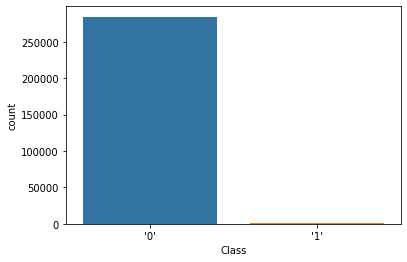

In [ ]:
#@title visualizing target variable distribution of the original dataset
import seaborn as sns
sns.countplot(df['Class'])

In [ ]:
#@title Cheking for null values in every column
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#@title Cleaned database :(1) Time feature removed, (2) Amount feature normalized, (3) Duplicate rows removed
# Cleaned database
from sklearn.preprocessing import StandardScaler
# Most of the features are normalized already, apart from amount and time. Time will be removed and amount will be normalized using standardScaler
normalize = StandardScaler()
df['Amount'] = normalize.fit_transform(df[['Amount']])
# Dropping Time variable
df.drop('Time', inplace=True, axis=1)
# Checking for row duplicates
duplicates = df[df.duplicated()]
duplicates.index

df_nodup = df.drop(duplicates.index)
df_nodup.shape
df_clean = df_nodup.copy()
df_clean

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,'0'
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,'0'
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,'0'
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,'0'
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,'0'
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,'0'
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,'0'
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,'0'


In [ ]:
#@title Separating features and label/target variables
# Separating features and label/target variables

X = df_clean.drop('Class', axis = 1)
y = df_clean['Class']


## Classifying original dataset using RF classifier

### Random Forest Classifier on original dataset

In [ ]:
# Binarizing target variable
y=y.map({"'1'": 1, "'0'": 0}).astype(int)

In [ ]:
#@title Training RF classifier using original training data
# For original dataset
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
rf = RandomForestClassifier(random_state=42)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
# Splitting original cleaned data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.3)

# Fitting RF model to the training data
rfffit = rf.fit(X_train,y_train)
rfpred = rf.predict(X_test)
# Displaying metrics such as F1 score, Accuracy score, Precision and recall scores.
print("F1 Score:",f1_score(y_test, rfpred), "\nPrecision:",precision_score(y_test, rfpred))
print(classification_report(y_test,rfpred))
print("Accuracy score: ",accuracy_score(y_test,rfpred))

F1 Score: 0.8065040650406503 
Precision: 0.8641114982578397
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    192637
           1       0.86      0.76      0.81       328

    accuracy                           1.00    192965
   macro avg       0.93      0.88      0.90    192965
weighted avg       1.00      1.00      1.00    192965

Accuracy score:  0.9993833078537558


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

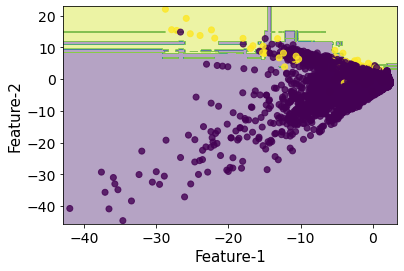

In [ ]:
plot_decision_boundaries(X_train,y_train,RandomForestClassifier)

## Undersampling the dominant class (Using NearMiss Algorithm)

Input Shape: (946, 29) 
Target Shape: (946,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


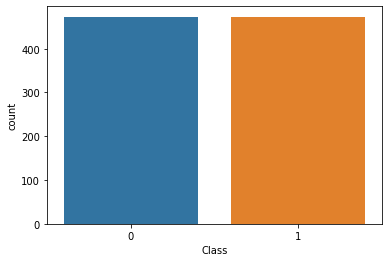

In [ ]:
#@title Undersampling dataset and visualizing target variable distribution

resample = NearMiss()
X_undersampl, y_undersampl = resample.fit_resample(X,y)
sns.countplot(y_undersampl)
y_undersampl
print("Input Shape:",X_undersampl.shape, "\nTarget Shape:", y_undersampl.shape)

In [ ]:
#@title Splitting undersampled dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train_undersampl, X_test_undersampl, y_train_undersampl, y_test_undersampl = train_test_split(X_undersampl, y_undersampl, random_state=42, train_size=0.3)

In [ ]:
#@title Training RF classifier using undersampled dataset
# For undersampled dataset

rffit_undersampl = rf.fit(X_train_undersampl,y_train_undersampl)
rfpred_undersampl = rf.predict(X_test_undersampl)
print("F1 Score:",f1_score(y_test_undersampl, rfpred_undersampl), "\nPrecision:",precision_score(y_test_undersampl, rfpred_undersampl))
print(classification_report(y_test_undersampl,rfpred_undersampl))
print("Accuracy score: ",accuracy_score(y_test_undersampl,rfpred_undersampl))


F1 Score: 0.9468599033816426 
Precision: 0.98
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       342
           1       0.98      0.92      0.95       321

    accuracy                           0.95       663
   macro avg       0.95      0.95      0.95       663
weighted avg       0.95      0.95      0.95       663

Accuracy score:  0.9502262443438914


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

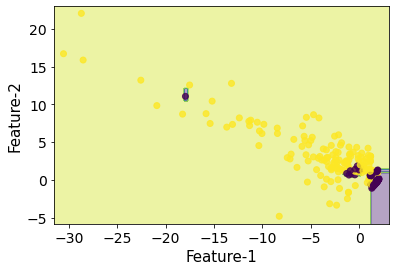

In [ ]:
plot_decision_boundaries(X_train_undersampl,y_train_undersampl,RandomForestClassifier)

## Oversampling the minority class (Using SMOTE)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


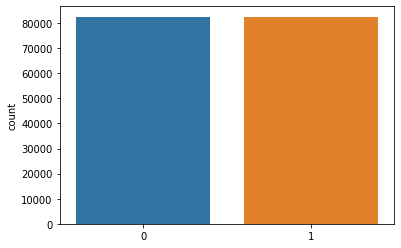

In [ ]:
#@title Oversampling minority class and visualizing class distribution
# Oversampling the minority class
# Using SMOTE (Synthetic Minority Oversampling Technique)
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_oversampl, y_train_oversampl = smote.fit_resample(X_train, y_train.ravel())


sns.countplot(y_train_oversampl)


In [ ]:
#@title Training RF model on oversampled data FIXED!
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_oversampling, y_train_oversampling = smote.fit_resample(X, y.ravel())


X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_train_oversampling, y_train_oversampling, random_state=42, train_size=0.3)

rffit_oversampled = rf.fit(X_train_oversampled,y_train_oversampled)
rfpred_oversampled = rf.predict(X_test_oversampled)
print("F1 Score:",f1_score(y_test_oversampled, rfpred_oversampled))
print("Precision:",precision_score(y_test_oversampled, rfpred_oversampled))
print(classification_report(y_test_oversampled,rfpred_oversampled))
print("Accuracy score: ",accuracy_score(y_test_oversampled,rfpred_oversampled))



F1 Score: 0.9997822085094248
Precision: 0.9995800584807449
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    192460
           1       1.00      1.00      1.00    192806

    accuracy                           1.00    385266
   macro avg       1.00      1.00      1.00    385266
weighted avg       1.00      1.00      1.00    385266

Accuracy score:  0.9997819688215415


In [ ]:
#@title Training RF model on oversampled data 
rffit_oversampl = rf.fit(X_train_oversampl,y_train_oversampl)
rfpred_oversampl = rf.predict(X_test)
print("F1 Score:",f1_score(y_test, rfpred_oversampl))
print("Precision:",precision_score(y_test, rfpred_oversampl))
print(classification_report(y_test,rfpred_oversampl))
print("Accuracy score: ",accuracy_score(y_test,rfpred_oversampl))


F1 Score: 0.8212560386473431
Precision: 0.8703071672354948
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    192637
           1       0.87      0.78      0.82       328

    accuracy                           1.00    192965
   macro avg       0.93      0.89      0.91    192965
weighted avg       1.00      1.00      1.00    192965

Accuracy score:  0.9994247661493016


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

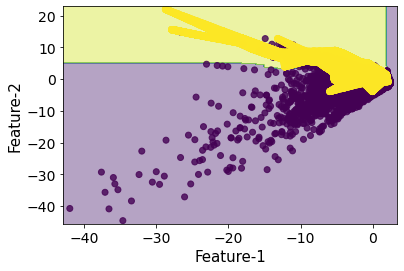

In [ ]:
plot_decision_boundaries(X_train_oversampl,y_train_oversampl,RandomForestClassifier)

## Results & Discussion


In [ ]:
#@title Visualizing important metrics for the experiments
print("Classification report for Original Dataset ")
print("F1 Score:",f1_score(y_test, rfpred), "\nPrecision:",precision_score(y_test, rfpred))
print(print(classification_report(y_test,rfpred)))
print("=================================================")
print("Classification report for NearMiss method")
print("F1 Score:",f1_score(y_test_undersampl, rfpred_undersampl), "\nPrecision:",precision_score(y_test_undersampl, rfpred_undersampl))
print(classification_report(y_test_undersampl,rfpred_undersampl))
print("=================================================")
print("Classification report for SMOTE method")
print("F1 Score:",f1_score(y_test, rfpred_oversampl))
print("Precision:",precision_score(y_test, rfpred_oversampl))
print(classification_report(y_test,rfpred_oversampl))


Classification report for Original Dataset 
F1 Score: 0.8065040650406503 
Precision: 0.8641114982578397
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    192637
           1       0.86      0.76      0.81       328

    accuracy                           1.00    192965
   macro avg       0.93      0.88      0.90    192965
weighted avg       1.00      1.00      1.00    192965

None
Classification report for NearMiss method
F1 Score: 0.9468599033816426 
Precision: 0.98
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       342
           1       0.98      0.92      0.95       321

    accuracy                           0.95       663
   macro avg       0.95      0.95      0.95       663
weighted avg       0.95      0.95      0.95       663

Classification report for SMOTE method
F1 Score: 0.8212560386473431
Precision: 0.8703071672354948
              precision    recall  f1-score   suppo

> We can see while comparing the metrics of unbalanced (original) and undersampled datasets that accuracy score is not a reliable measure in some cases. Accuracy score is almost 100% for original dataset, while for undersampled one it is aroud 95%. Nevertheless, undersampled dataset showed higher F1 and Precision scores compared to the original dataset. In the presence of imbalanced data, it is important to be able to identify True positives and true negatives with a high precision, that is why accuracy measure is not reliable, as it is heavily affected by correctly labeled dominant classes (the number of which is much more than the other class). We can also observe that NearMiss works better than SMOTE in this case. Undersampling the majority class has better performance than oversampling minority class.


# References

*   https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html

*   https://scikit-learn.org/stable/modules/impute.html - imputation of missing values

*   https://sdv.dev/SDV/ - SDV can create synthetic dataset based on already existing dataset.

*   https://www.kaggle.com/datasets/yasserh/horse-survival-dataset - dataset with many missing values

*   https://towardsdatascience.com/top-3-python-packages-to-generate-synthetic-data-33a351a5de0c  - Top 3 packages for generating synth data

*  https://datahub.io/machine-learning/creditcard#resource-creditcard - Credit Card Fraud Dataset source

*  https://openmv.net/info/class-grades - Class grades dataset
